<a href="https://colab.research.google.com/github/krishnx27/examplerepository/blob/main/object_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

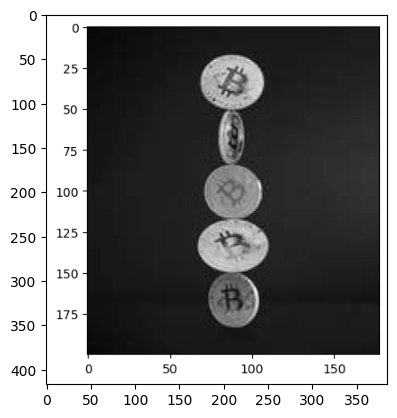

In [4]:
#Read input and converting  BGR To Gray
img = cv2.imread('/content/bitcoin.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

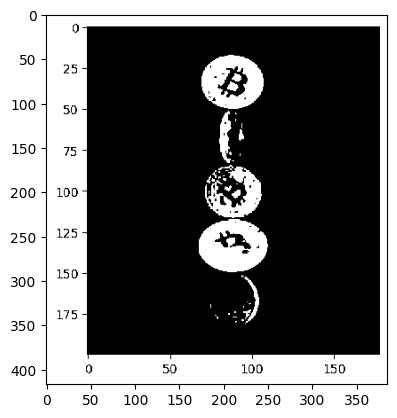

In [5]:
#thresolding and Bluring
ret, thr = cv2.threshold(gray, 0, 255,cv2.THRESH_OTSU)
plt.imshow(thr,cmap='gray')

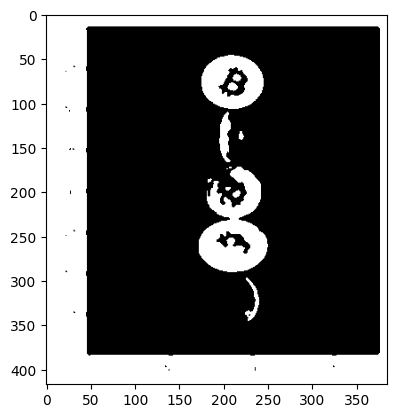

In [6]:
blur = cv2.medianBlur(thr, 5)
plt.imshow(blur,cmap='gray')

In [7]:
# find contours
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = []
for x in contours:
  area = cv2.contourArea(x)
  if area > 0:
    count.append(x)

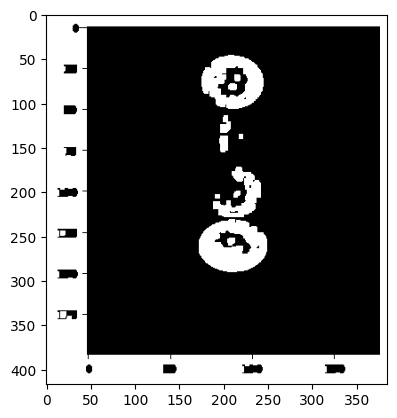

In [8]:
## Morphology operation to remove noise
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thr,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening,cmap='gray')

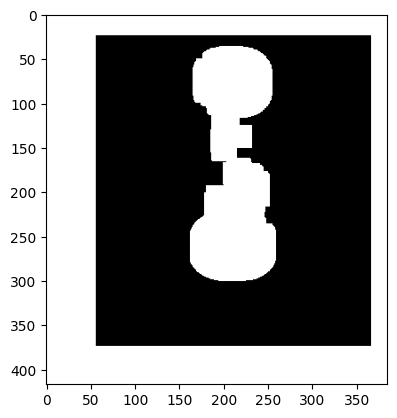

In [9]:
#extracting region background and foreground
background = cv2.dilate(opening,kernel,iterations=10)
plt.imshow(background,cmap='gray')

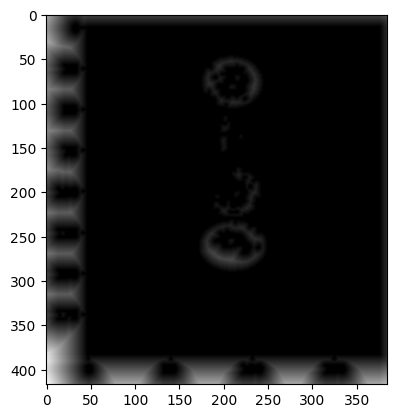

In [13]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
plt.imshow(dist_transform,cmap='gray')

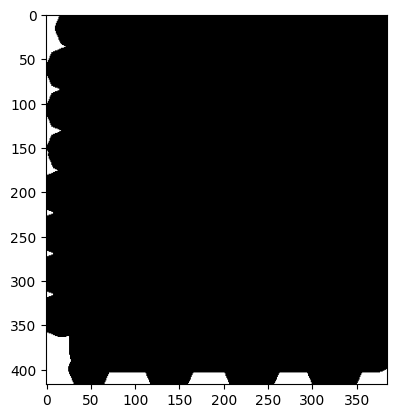

In [14]:
ret2 , foreground = cv2.threshold(dist_transform, 0.4*dist_transform.max(),255,0)
foreground = np.uint8(foreground)
plt.imshow(foreground,cmap='gray')

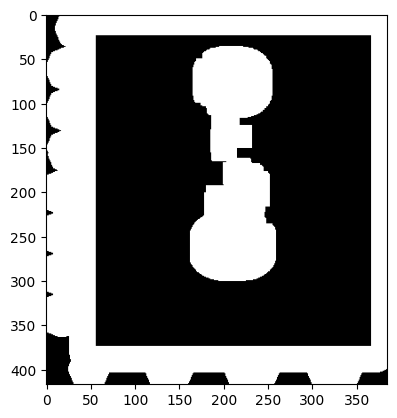

In [15]:
## region which are not in background and foreground
unknown = cv2.subtract(background,foreground)
plt.imshow(unknown,cmap='gray')

In [16]:
#marking0 region
ret3 ,markers = cv2.connectedComponents(foreground)
markers = markers + 10
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
# apply watershade
markers = cv2.watershed(img,markers)

In [17]:
ws = len(np.unique(markers)) -1
ans = int((ws + len(count)) / 2)
print("number of objects segments detected = ", ans)

number of objects segments detected =  22


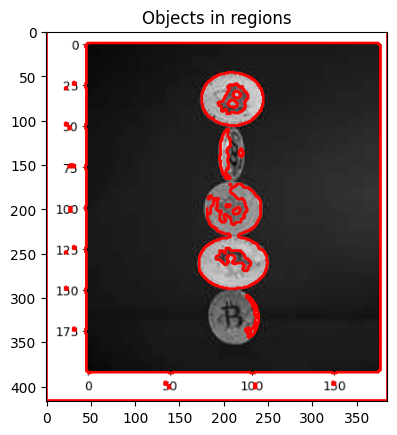

In [18]:
#drawing contour around objects
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, count, -1, (256,0,0), 2)
plt.title('Objects in regions')
plt.imshow(rgb)